This lab focuses on constructing more and more complicated functions to handle tasks that need to be repeated.

# Approximating the exponential function

Consider the Taylor series expansion for $e^x$ about the point $x=0$: 

$$e^x = \sum_{n=0}^\infty \frac{x^n}{n!}, $$

where $x>0$. If, in addition, $x < 1$, then successive terms of the series diminish in size, so that the partial sum 

$$ P_N(x) = \sum_{n=0}^N \frac{x^n}{n!} $$ 

represents a good approximation of $e^x$. 
Now Taylor's Theorem (Lecture 1) says: 

$$ e^x = P_N(x) + \frac{e^{\xi} x^{N+1}}{(N+1)!},$$

where $0 < \xi < x$. Since $x < 1$, we have that $\xi < 1$, and 

$$ \frac{e^{\xi} x^{N+1}}{(N+1)!} < \frac{e}{(N+1)!}.$$ 

This allows us to quantify the error we make when we truncate Taylor's series: 

$$ e^x - P_N(x)  \leq \frac{e}{(N+1)!} \approx \frac{1}{(N+1)!}. $$

# Exercise 1

*Question*: Write a function `exp_unit_interval(x)` to compute the exponential function to an absolute accuracy of $10^{-6}$ for $0 \leq x \leq 1$.

*Solution*:

In [1]:
def exp_unit_interval(x, absolute_accuracy=1e-6):
    partial_sum = 0
    x_to_power_n = 1
    inverse_factorial = 1
    n = 0
    while inverse_factorial > absolute_accuracy:
        partial_sum += x_to_power_n*inverse_factorial
        # compute next term in partial series:
        x_to_power_n *= x
        n += 1
        inverse_factorial /= float(n)
    return partial_sum 

import numpy as np 
print exp_unit_interval(0.5)
print np.exp(0.5)

1.64872127042
1.6487212707


*Question*: Create a plot of the absolute error as a function of $x$ for a variety of $x$-values both less than and greater than 1. Use the `semilogy()` command from the `numpy` library to help with this visualzation.

*Solution*:

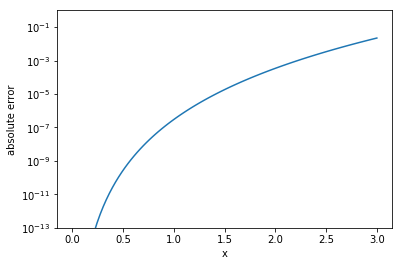

In [2]:
# ADVANCED NOTE: 
# It is bad practice to duplicate code 
# Instead, put such code into a function
# Since I will re-use this plotting code later, I've put it into a function
def error_plot(f, f_approx): 
    from matplotlib import pyplot as plt 
    %matplotlib inline 

    x = np.linspace(0,3,100)
    absolute_error = abs(f(x) - f_approx(x))
    plt.semilogy(x,absolute_error)
    plt.gca().set_ylim([1e-13, 1e0])    
    plt.ylabel('absolute error')
    plt.xlabel('x')
    
error_plot(np.exp, exp_unit_interval)

# Exercise 2

*Question*: Construct a function `exp_argument_reduce(y)` that computes the exponential function for any number $y > 0$ using `exp_unit_interval(x)`, where $0 < x < 1$ and $y = x z$ for some $z$. [Hint: Use the fact that $e^y = e^{xz} = (e^x)^z$. One simple approach is to choose $z$ to be of the form $2^m$ for some integer $m$.]

*Solution*:

In [3]:
def exp_argument_reduce(y):
    m = 0
    while y > 1:
        y /= 2.0
        m += 1        
    return exp_unit_interval(y)**(2**m)

print exp_argument_reduce(2)
print np.exp(2)

7.38905445227
7.38905609893


*Question*: Re-create your error plot from the previous exercise. 
You'll need to execute
```
exp_argument_reduce_vectorized = np.vectorize(exp_argument_reduce)
```
to allow the function `exp_argument_reduce` to deal with the fact that its argument is now a `numpy` array instead of just a single number.

*Solution*:

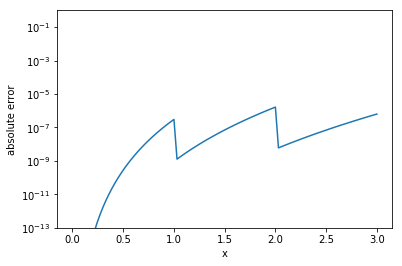

In [4]:
exp_argument_reduce_vectorized = np.vectorize(exp_argument_reduce)
error_plot(np.exp, exp_argument_reduce_vectorized)

# Exercise 3

Recall our bisection algorithm:

In [5]:
def different_sign(a, b):
    return a * b < 0.0

def bisection(func, low, high, n_max=100): 
    assert different_sign(func(low), func(high))
    
    for i in range(n_max):
        midpoint = (low + high) / 2.0
        if different_sign(func(low), func(midpoint)):
            high = midpoint
        else:
            low = midpoint
            
    return midpoint


*Question*: Write a function `log_bisection(x)` to compute $\log(x)$ using your `exp_argument_reduce_vectorized` function and `bisection`. What challenges do you encounter?

*Solution*:
The trick is to notice that if $y = \log(x)$, for a given $x$, then $y$ is the solution of the equation 

$$ e^y - x = 0,$$

where we consider $x$ to be a parameter (constant). Of course, we may solve this equation using the bisection method: 

In [6]:
def log_bisection(x, low=0, high=10):
    f = lambda y: exp_argument_reduce_vectorized(y) - x
    return bisection(f,low,high)
print log_bisection(2)
print np.log(2)

0.693147184323
0.69314718056


Here, I have assumed that the interval $[0,10]$ brackets $\log(x)$, but this isn't true for all $x$: $\log(x)$ is monotonically increasing, so it will eventually attain values greater than 10. However, this rise is very slow (meaning that one has to increase $x$ by orders of magnitude before this happens), so choosing brackets for the user (of the function `log_bisection`) is a reasonable thing to do:

In [7]:
for n in range(1,8): 
    x = 10**n
    print 'x = ', x, 'log(x) = ', log_bisection(x)

x =  10 log(x) =  2.30258509561
x =  100 log(x) =  4.60517019121
x =  1000 log(x) =  6.90775551128
x =  10000 log(x) =  9.21034038243
x =  100000 log(x) = 

AssertionError: 